# Business Objectives and Data Information

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

## Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>

# Importing required libraries

## General Libraries

In [1]:

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np


## Plotting libraries

In [2]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## NLP Featurization and Categorical Data Featurization libraries

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Reading Data

In [4]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

# Exploratory Data Analysis 

## Number of data points and fields

In [82]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)
print('-'*50)
project_data.head(2)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']
--------------------------------------------------


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1


In [83]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## Percentage of projects approved vs not approved

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


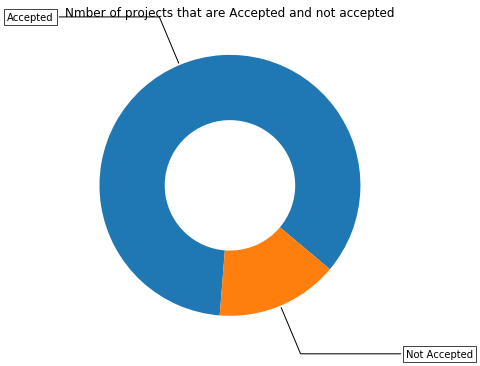

In [84]:

# Credits: https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

## Univariate Analysis

### Approved projects w.r.t state

In [85]:
temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()

In [86]:
temp.columns = ['state_code', 'num_proposals']

In [87]:
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [88]:
#Credits: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html

#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('% of projects aproved state wise')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039  
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

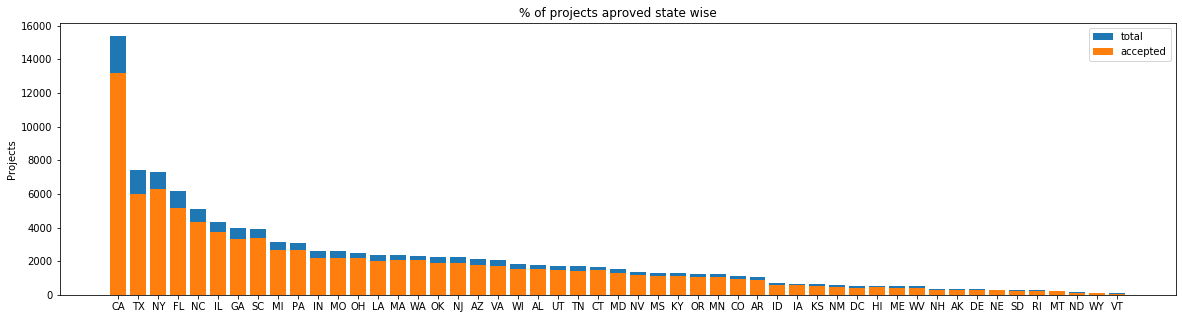

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [89]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

### Univariate Analysis: teacher_prefix

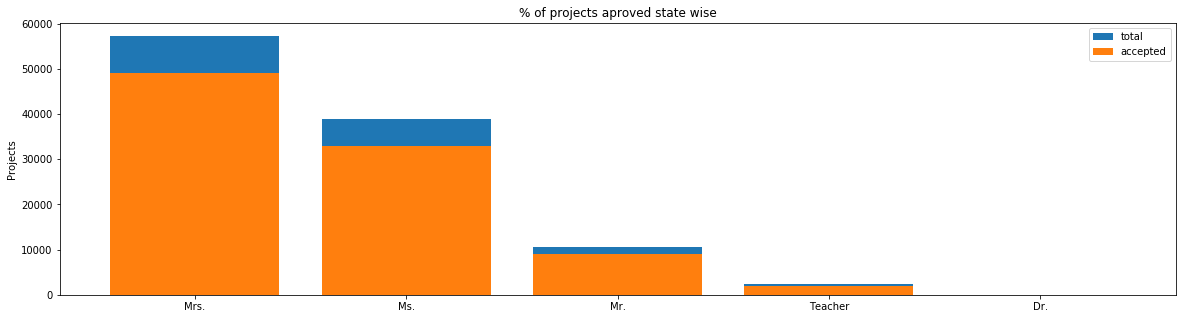

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [90]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### Univariate Analysis: project_grade_category

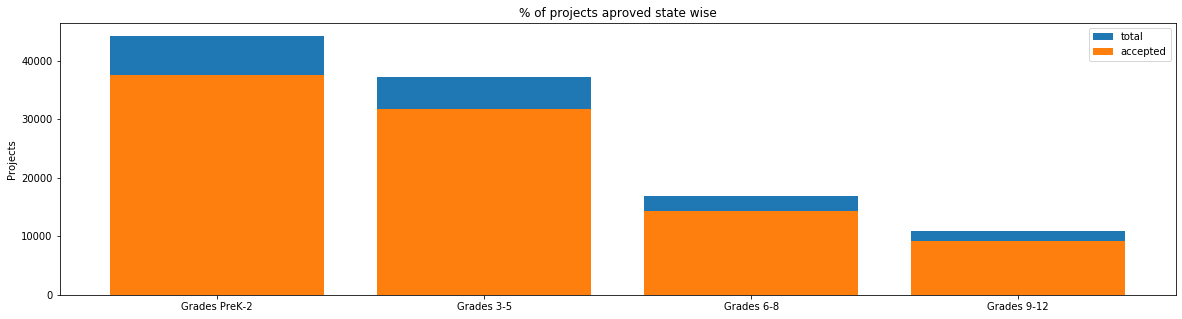

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [91]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### Univariate Analysis: project_subject_categories

In [92]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [93]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


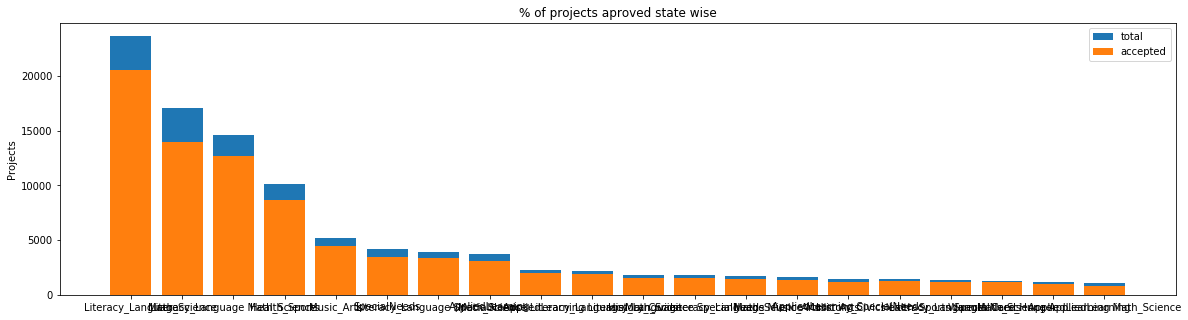

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [94]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [95]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

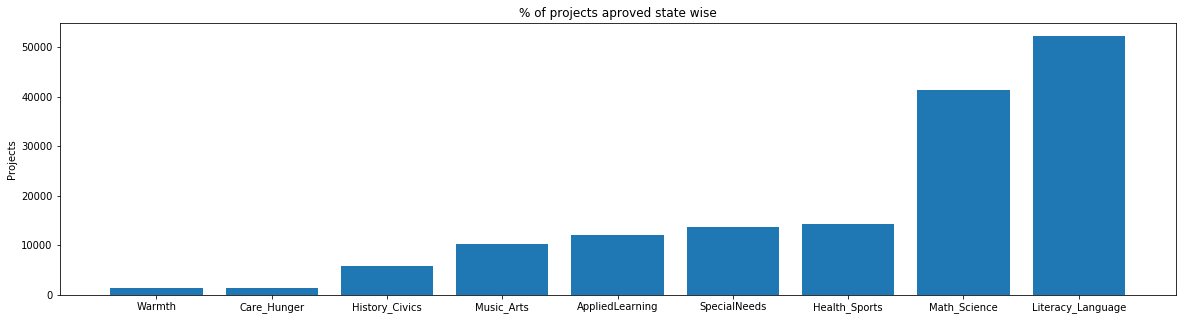

In [96]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [97]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### Univariate Analysis: project_subject_subcategories

In [98]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [99]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


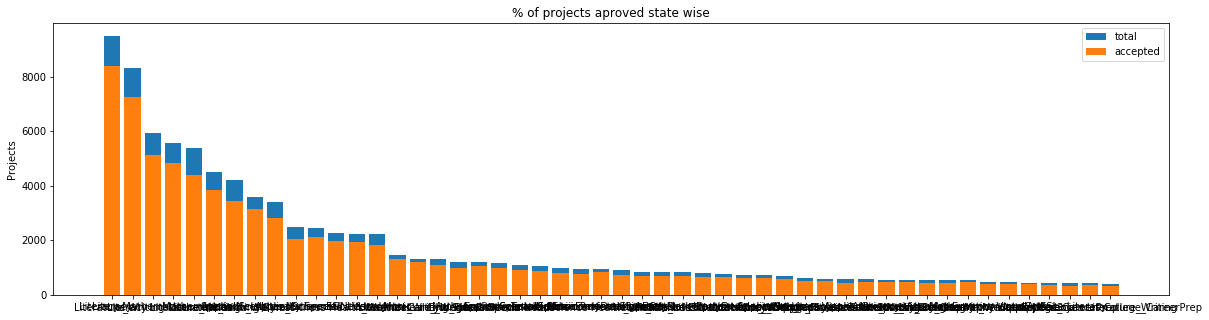

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [100]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [101]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

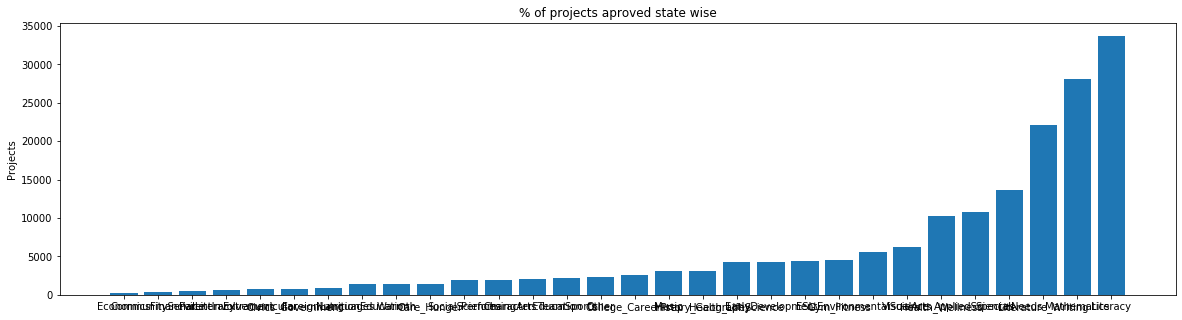

In [102]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [103]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### Univariate Analysis: Text features (Title)

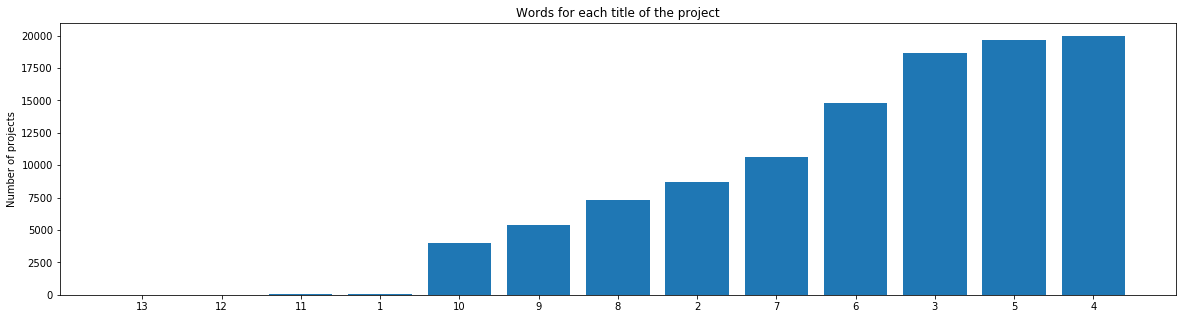

In [104]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [105]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

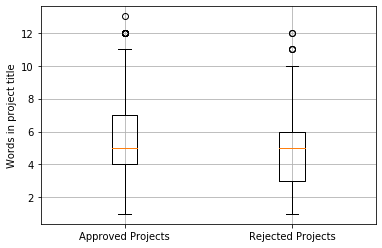

In [106]:
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

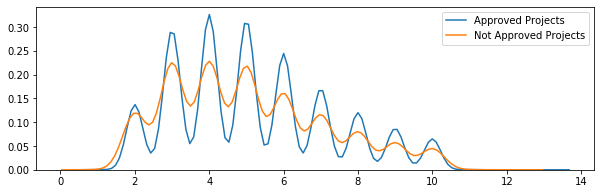

In [107]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

### Univariate Analysis: Text features (Project Essay's)

In [108]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

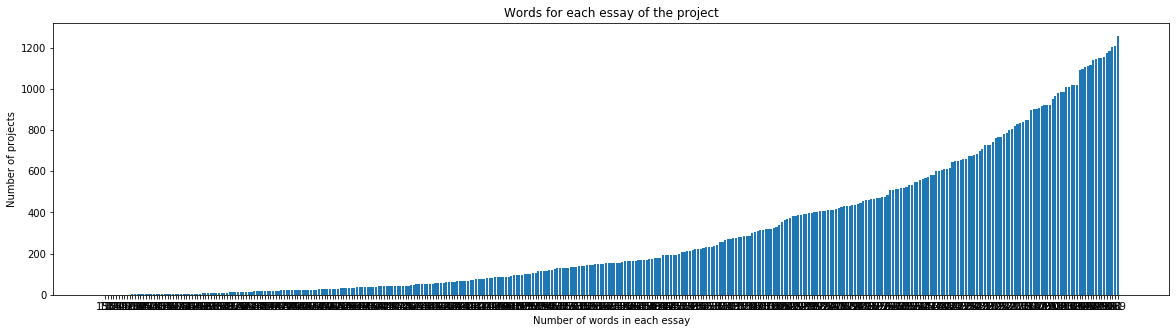

In [109]:
word_count = project_data['essay'].str.split().apply(len).value_counts()  
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.xlabel('Number of words in each essay')
plt.title('Words for each essay of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

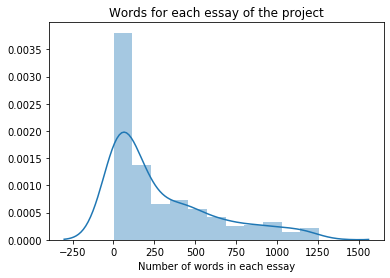

In [110]:
sns.distplot(word_count.values)
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each essay')
plt.show()

In [111]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

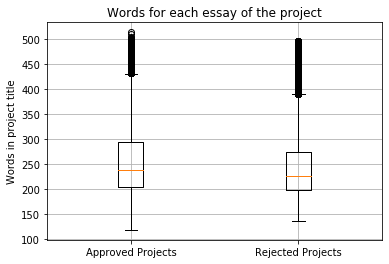

In [112]:
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

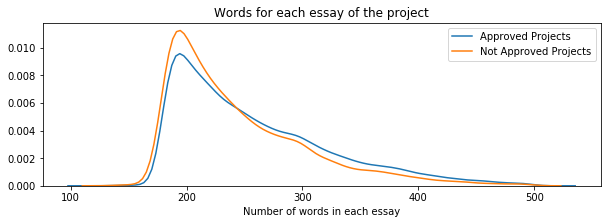

In [113]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each essay')
plt.legend()
plt.show()

### Univariate Analysis: Cost per project

In [114]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [115]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [116]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [117]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values
rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

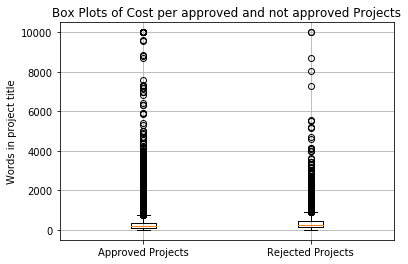

In [118]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

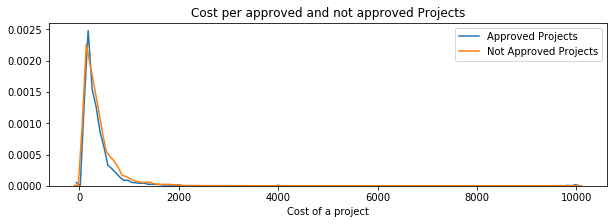

In [119]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [120]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

### Univariate Analysis: teacher_number_of_previously_posted_projects

In [121]:
approved_prev = project_data[project_data['project_is_approved']==1]['teacher_number_of_previously_posted_projects'].values

rejected_prev = project_data[project_data['project_is_approved']==0]['teacher_number_of_previously_posted_projects'].values

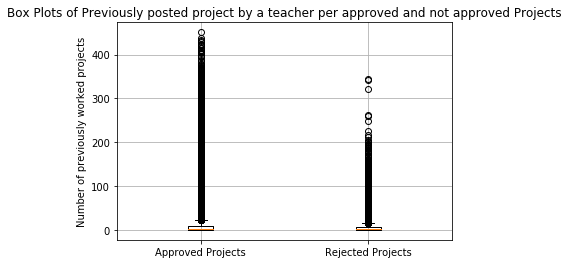

In [122]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_prev, rejected_prev])
plt.title('Box Plots of Previously posted project by a teacher per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Number of previously worked projects')
plt.grid()
plt.show()

### Univariate Analysis: project_resource_summary

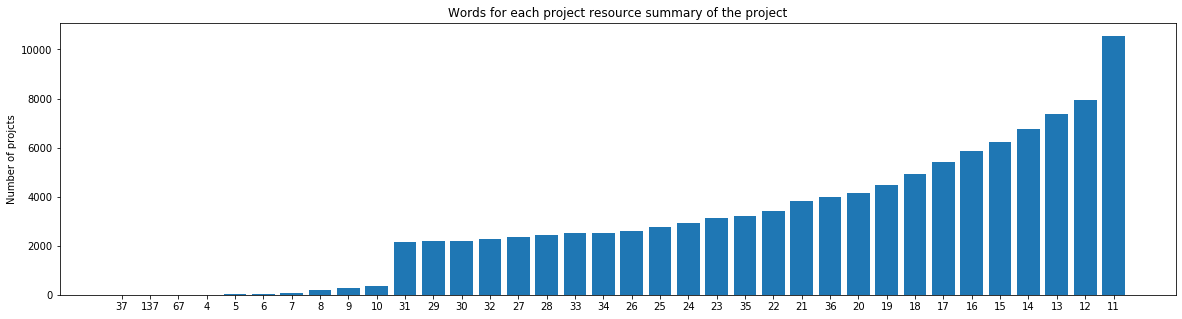

In [123]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_resource_summary'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projcts')
plt.title('Words for each project resource summary of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [124]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_resource_summary'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_resource_summary'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

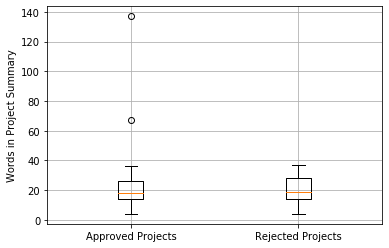

In [125]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in Project Summary')
plt.grid()
plt.show()

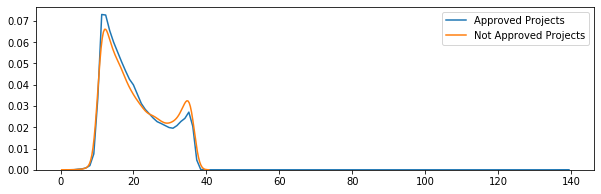

In [126]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

# Data Preprocessing

In [127]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

## Preprocessing Categorical Features: project_grade_category

In [5]:
project_data['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [6]:
#we need to remove the spaces, replace the '-' with '_' and convert all the letters to small

project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

## Preprocessing Categorical Features: project_subject_categories

In [7]:
project_data['project_subject_categories'].value_counts()

Literacy & Language                           23655
Math & Science                                17072
Literacy & Language, Math & Science           14636
Health & Sports                               10177
Music & The Arts                               5180
Special Needs                                  4226
Literacy & Language, Special Needs             3961
Applied Learning                               3771
Math & Science, Literacy & Language            2289
Applied Learning, Literacy & Language          2191
History & Civics                               1851
Math & Science, Special Needs                  1840
Literacy & Language, Music & The Arts          1757
Math & Science, Music & The Arts               1642
Applied Learning, Special Needs                1467
History & Civics, Literacy & Language          1421
Health & Sports, Special Needs                 1391
Warmth, Care & Hunger                          1309
Math & Science, Applied Learning               1220
Applied Lear

In [8]:
#remove spaces, 'the'
#replace '&' with '_', and ',' with '_'

project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' ','')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace('&','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(',','_')
project_data['project_subject_categories'] = project_data['project_subject_categories'].str.lower()
project_data['project_subject_categories'].value_counts()

literacy_language                       23655
math_science                            17072
literacy_language_math_science          14636
health_sports                           10177
music_arts                               5180
specialneeds                             4226
literacy_language_specialneeds           3961
appliedlearning                          3771
math_science_literacy_language           2289
appliedlearning_literacy_language        2191
history_civics                           1851
math_science_specialneeds                1840
literacy_language_music_arts             1757
math_science_music_arts                  1642
appliedlearning_specialneeds             1467
history_civics_literacy_language         1421
health_sports_specialneeds               1391
warmth_care_hunger                       1309
math_science_appliedlearning             1220
appliedlearning_math_science             1052
literacy_language_history_civics          809
health_sports_literacy_language   

## Preprocessing Categorical Features: teacher_prefix

In [9]:
project_data['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [10]:
# check if we have any nan values are there
print(project_data['teacher_prefix'].isnull().values.any())
print("number of nan values",project_data['teacher_prefix'].isnull().values.sum())

True
number of nan values 3


Number of missing values are very less in number, we can replace it with Mrs. as most of the projects are submitted by Mrs.

In [11]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')

In [12]:
project_data['teacher_prefix'].value_counts()

Mrs.       57272
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [13]:
#Remove '.'
#convert all the chars to small

project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix'].value_counts()

mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: teacher_prefix, dtype: int64

## Preprocessing Categorical Features: project_subject_subcategories

In [14]:
project_data['project_subject_subcategories'].value_counts()

Literacy                                        9486
Literacy, Mathematics                           8325
Literature & Writing, Mathematics               5923
Literacy, Literature & Writing                  5571
Mathematics                                     5379
                                                ... 
History & Geography, Warmth, Care & Hunger         1
Gym & Fitness, Warmth, Care & Hunger               1
Literature & Writing, Nutrition Education          1
College & Career Prep, Warmth, Care & Hunger       1
Civics & Government, Nutrition Education           1
Name: project_subject_subcategories, Length: 401, dtype: int64

In [15]:
#remove spaces, 'the'
#replace '&' with '_', and ',' with '_'

project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' The ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' ','')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace('&','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(',','_')
project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.lower()
project_data['project_subject_subcategories'].value_counts()

literacy                                9486
literacy_mathematics                    8325
literature_writing_mathematics          5923
literacy_literature_writing             5571
mathematics                             5379
                                        ... 
extracurricular_financialliteracy          1
economics_music                            1
parentinvolvement_warmth_care_hunger       1
economics_foreignlanguages                 1
financialliteracy_foreignlanguages         1
Name: project_subject_subcategories, Length: 401, dtype: int64

## Preprocessing Categorical Features: school_state

In [16]:
project_data['school_state'].value_counts()

CA    15388
TX     7396
NY     7318
FL     6185
NC     5091
IL     4350
GA     3963
SC     3936
MI     3161
PA     3109
IN     2620
MO     2576
OH     2467
LA     2394
MA     2389
WA     2334
OK     2276
NJ     2237
AZ     2147
VA     2045
WI     1827
AL     1762
UT     1731
TN     1688
CT     1663
MD     1514
NV     1367
MS     1323
KY     1304
OR     1242
MN     1208
CO     1111
AR     1049
ID      693
IA      666
KS      634
NM      557
DC      516
HI      507
ME      505
WV      503
NH      348
AK      345
DE      343
NE      309
SD      300
RI      285
MT      245
ND      143
WY       98
VT       80
Name: school_state, dtype: int64

convert all of them into small letters

In [17]:
project_data['school_state'] = project_data['school_state'].str.lower()
project_data['school_state'].value_counts()

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

## Preprocessing Categorical Features: project_title

In [18]:
#Credits: https://stackoverflow.com/a/47091490/4084039

import re
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [20]:
project_data['project_title'].head(5)

0     Educational Support for English Learners at Home
1                Wanted: Projector for Hungry Learners
2    Soccer Equipment for AWESOME Middle School Stu...
3                               Techie Kindergarteners
4                               Interactive Math Tools
Name: project_title, dtype: object

In [21]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [22]:
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent) #we only want alpha numeric characters
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords) #we are removing stop words
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [23]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|██████████| 109248/109248 [00:03<00:00, 27358.40it/s]


In [24]:
print("printing previously printed random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])

printing previously printed random reviews
9 love reading pure pleasure
34 ball
147 needs chromebook


## Preprocessing Text Features: essay

In [25]:
project_data# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [26]:
print("printing some random essay")
print(9, project_data['essay'].values[9])
print('-'*50)
print(34, project_data['essay'].values[34])
print('-'*50)
print(147, project_data['essay'].values[147])

printing some random essay
9 Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my st

In [27]:
#Preprocessing essays with previously defined function
preprocessed_essays = preprocess_text(project_data['essay'].values)

100%|██████████| 109248/109248 [01:41<00:00, 1071.86it/s]


In [28]:
print("printing previously printed random essays")
print(9, preprocessed_essays[9])
print('-'*50)
print(34, preprocessed_essays[34])
print('-'*50)
print(147, preprocessed_essays[147])

printing previously printed random essays
9 95 students free reduced lunch homeless despite come school eagerness learn students inquisitive eager learners embrace challenge not great books resources every day many not afforded opportunity engage big colorful pages book regular basis home not travel public library duty teacher provide student opportunity succeed every aspect life reading fundamental students read books boosting comprehension skills books used read alouds partner reading independent reading engage reading build love reading reading pure enjoyment introduced new authors well old favorites want students ready 21st century know pleasure holding good hard back book hand nothing like good book read students soar reading consideration generous funding contribution help build stamina prepare 3rd grade thank much reading proposal nannan
--------------------------------------------------
34 students mainly come extremely low income families majority come homes parents work full 

## Preprocessing Numerical Values: price

In [29]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [30]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [31]:
project_data['price'].head()

0    154.60
1    299.00
2    516.85
3    232.90
4     67.98
Name: price, dtype: float64

### applying StandardScaler

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['std_price']=scaler.transform(project_data['price'].values.reshape(-1, 1) )

In [33]:
project_data['std_price'].head()

0   -0.390533
1    0.002396
2    0.595191
3   -0.177469
4   -0.626236
Name: std_price, dtype: float64

### applying MinMaxScaler

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['nrm_price']=scaler.transform(project_data['price'].values.reshape(-1, 1))

In [35]:
project_data['nrm_price'].head()

0    0.015397
1    0.029839
2    0.051628
3    0.023228
4    0.006733
Name: nrm_price, dtype: float64

## Saving cleaned Data

In [161]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'essay', 'price', 'quantity', 'std_price', 'nrm_price'],
      dtype='object')

We will drop of few columns i.e. Unnamed: 0 , id, teacher_id, project_submitted_datetime, project_essay_1, project_essay_2, project_essay_3, project_essay_4, project_title, project_resource_summary, quantiy, std_price, nrm_price

In [162]:
project_data.drop( ['Unnamed: 0', 'id', 'teacher_id' ,'project_submitted_datetime', 'project_essay_1', 'project_essay_2', 'project_essay_3',
                  'project_essay_4', 'project_title', 'project_resource_summary', 'quantity', 'std_price', 'nrm_price'], axis = 1, inplace = True)

In [163]:
project_data.rename(columns={"project_subject_categories": "clean_categories", "project_subject_subcategories": "clean_subcategories"})

,teacher_prefix,school_state,project_grade_category,clean_categories,clean_subcategories,teacher_number_of_previously_posted_projects,project_is_approved,essay,price
0,mrs,in,grades_prek_2,literacy_language,esl_literacy,0,0,My students are English learners that are work...,154.60
1,mr,fl,grades_6_8,history_civics_health_sports,civics_government_teamsports,7,1,Our students arrive to our school eager to lea...,299.00
2,ms,az,grades_6_8,health_sports,health_wellness_teamsports,1,0,"\r\n\""True champions aren't always the ones th...",516.85
3,mrs,ky,grades_prek_2,literacy_language_math_science,literacy_mathematics,4,1,I work at a unique school filled with both ESL...,232.90
4,mrs,tx,grades_prek_2,math_science,mathematics,1,1,Our second grade classroom next year will be m...,67.98
...,...,...,...,...,...,...,...,...,...
109243,mr,mo,grades_prek_2,literacy_language_math_science,literature_writing_mathematics,0,1,Welcome to Mr. Ramos's 2nd grade classroom! We...,59.98
109244,ms,nj,grades_prek_2,literacy_language_math_science,literacy_mathematics,0,1,"Every morning, we start our day with our core ...",846.32
109245,mrs,nj,grades_prek_2,literacy_language_math_science,literacy_mathematics,3,1,This is a great group of sharing and caring st...,239.96
109246,mrs,ny,grades_3_5,health_sports_specialneeds,health_wellness_specialneeds,0,1,Our students live in a small rural community. ...,73.05


project_data.to_csv('preprocessed_data.csv', index = False)

# Encoding Data and Preparation

<b> we will be discarding Title feature as it was not asked in the assignment. Although same NLP featurization 
can be applied easlity to Title feature</b>

## Cleaned Data Loading

In [2]:
#considering all the datapoints

import pandas
data = pandas.read_csv('preprocessed_data.csv')

In [3]:
#separating features and target variable.
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1) #axis=1 is for columns
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


## Splitting data into Train and cross validation(or test): Stratified Sampling

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
    
# train test split only since I'll be using Random search CV for hyper parameter optimization which will take care of cross validation while looking for the best parameters.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
# print("="*100)

# X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)
# print(X_train.shape, y_train.shape)
# print(X_cv.shape, y_cv.shape)
# print(X_test.shape, y_test.shape)

(73196, 8) (73196,)
(36052, 8) (36052,)


## Encoding Categorical and Text Features

### Encoding Text Feature

#### Applying BOW on the feature essay

In [11]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

    #applying BOW on on the feature essay 

    
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)


vectorizer1 = CountVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer1.fit(X_train['essay'].values) # fit has to happen only on train data so that our features in train and test data are almost same

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer1.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer1.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

(73196, 8) (73196,)
(36052, 8) (36052,)
After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


#### Applying tfidf on the feature essay

In [12]:

vectorizer2 = TfidfVectorizer(min_df=10, ngram_range=(1,4), max_features=5000)
vectorizer2.fit(X_train['essay'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer2.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer2.transform(X_test['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)


After vectorizations
(73196, 5000) (73196,)
(36052, 5000) (36052,)


#### Applying tfidf w2v on the feature essay using Glove Model

In [13]:
import pickle
#please use below code to load glove vectors 
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [14]:
from tqdm import tqdm
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))
print(avg_w2v_vectors_train[0])

100%|██████████| 73196/73196 [00:46<00:00, 1563.08it/s]

73196
300
[ 4.73725048e-02  2.38896362e-02  4.95278389e-02 -9.57123024e-02
  3.43217476e-02 -2.59640167e-02 -3.07434139e+00  1.04538246e-01
  5.64200063e-02  1.36064841e-02 -7.63119683e-03  2.56238637e-02
  5.04949709e-02 -1.52420003e-01  1.57562198e-02 -2.36712675e-02
 -5.33021667e-02 -8.99859992e-02  6.71162190e-02 -3.15196111e-02
  1.13671437e-02  2.31110000e-02 -6.20611683e-02 -9.41257143e-03
 -5.78088230e-02 -5.87769524e-02  7.95737500e-02 -5.44793021e-02
 -8.76571437e-02 -1.41151535e-01 -2.51925210e-01 -1.25579373e-01
 -5.72826516e-02 -1.43736214e-02 -2.04558476e-02 -2.70639359e-02
 -6.72440095e-02 -6.50135595e-02  1.10255270e-02 -1.05511580e-01
 -1.39092611e-02  4.39773174e-02  7.52484635e-02 -7.14382529e-02
 -1.93438003e-02 -3.03745460e-02  3.07968698e-02 -1.38649230e-01
  6.91494730e-02 -1.83688322e-01  2.41617111e-02 -4.77186976e-02
 -1.89012579e-02 -1.03679964e-01  6.66433024e-02 -2.31746452e-02
  7.29171905e-03  3.33416159e-02 -7.28718413e-02  8.81889127e-02
 -4.23683413e-0

In [15]:
avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

100%|██████████| 36052/36052 [00:27<00:00, 1314.94it/s]


### One Hot Encoding School State

In [16]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label


# 1. One Hot Encoding school_state
vectorizer3 = CountVectorizer()
vectorizer3.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer3.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer3.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer3.get_feature_names())
print("="*100)

After vectorizations
(73196, 51) (73196,)
(36052, 51) (36052,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### One Hot Encoding teacher_prefix

In [17]:
vectorizer4 = CountVectorizer()
vectorizer4.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer4.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer4.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer4.get_feature_names())
print("="*100)

After vectorizations
(73196, 5) (73196,)
(36052, 5) (36052,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


### One Hot Encoding project_grade_category

In [18]:

vectorizer5 = CountVectorizer()
vectorizer5.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer5.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer5.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer5.get_feature_names())
print("="*100)

After vectorizations
(73196, 4) (73196,)
(36052, 4) (36052,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### One Hot Encoding clean_categories

In [19]:
vectorizer6 = CountVectorizer()
vectorizer6.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories_ohe = vectorizer6.transform(X_train['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer6.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print(vectorizer6.get_feature_names())
print("="*100)

After vectorizations
(73196, 9) (73196,)
(36052, 9) (36052,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


### One Hot Encoding clean_subcategories

In [20]:
vectorizer7 = CountVectorizer()
vectorizer7.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories = vectorizer7.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories = vectorizer7.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories.shape, y_train.shape)
print(X_test_clean_subcategories.shape, y_test.shape)
print(vectorizer7.get_feature_names())
print("="*100)

After vectorizations
(73196, 30) (73196,)
(36052, 30) (36052,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


## Encoding Numerical Features

### Normalizing Price Feature

In [21]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature. Which is the case below i.e. we only have one feature i.e. price
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm = X_train_price_norm.reshape(-1,1)
X_test_price_norm = X_test_price_norm.reshape(-1,1)



print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


### Normalizing teacher_number_of_previously_posted_projects Feature

In [22]:
#teacher_number_of_previously_posted_projects


from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_number_of_previously_posted_projects_norm = X_train_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects_norm = X_test_teacher_number_of_previously_posted_projects_norm.reshape(-1,1)

print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, y_train.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73196, 1) (73196,)
(36052, 1) (36052,)


# Concatenating all the features

## Set1: Features where essay is vectorized using BOW

In [23]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_set1 = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories, X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te_set1 = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories, X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix Of Set1")
print(X_tr_set1.shape, y_train.shape)
print(X_te_set1.shape, y_test.shape)
print("="*100)

Final Data matrix Of Set1
(73196, 5101) (73196,)
(36052, 5101) (36052,)


## Set2: Features where essay is vectorized using TFIDF

In [24]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_set2 = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories, X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te_set2 = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories, X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix Of Set2")
print(X_tr_set2.shape, y_train.shape)
print(X_te_set2.shape, y_test.shape)
print("="*100)

Final Data matrix Of Set2
(73196, 5101) (73196,)
(36052, 5101) (36052,)


## Set3: Features where essay is vectorized using TFIDF W2V

In [25]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_tr_set3 = hstack((avg_w2v_vectors_train, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories, X_train_price_norm, X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te_set3 = hstack((avg_w2v_vectors_test, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories, X_test_price_norm, X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix Of Set3")
print(X_tr_set3.shape, y_train.shape)
print(X_te_set3.shape, y_test.shape)
print("="*100)

Final Data matrix Of Set3
(73196, 401) (73196,)
(36052, 401) (36052,)


# Machine Learning Models

Although we have featurized essay feature with various featurization technqiues. But for the sake of simplicity we will be using only 
Set 2 data i.e. where essay is vectorized using TFIDF.

## KNN

### Hyperparameter Optimization

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV


parameters = {'n_neighbors':[3, 15, 25, 51, 101]}
clf = RandomizedSearchCV(neigh, parameters, cv=5, scoring='roc_auc')
clf.fit(X_tr_set2, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
# results = results.sort_values(['param_n_neighbors'])
# train_auc= results['mean_train_score']
# train_auc_std= results['std_train_score']
# cv_auc = results['mean_test_score'] 
# cv_auc_std= results['std_test_score']
# K =  results['param_n_neighbors']

# plt.plot(K, train_auc, label='Train AUC')
# # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# # plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

# plt.plot(K, cv_auc, label='CV AUC')
# # this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# # plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

# plt.scatter(K, train_auc, label='Train AUC points')
# plt.scatter(K, cv_auc, label='CV AUC points')


# plt.legend()
# plt.xlabel("K: hyperparameter")
# plt.ylabel("AUC")
# plt.title("Hyper parameter Vs AUC plot")
# plt.grid()
# plt.show()

# results.head()

In [41]:
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

### Prediction

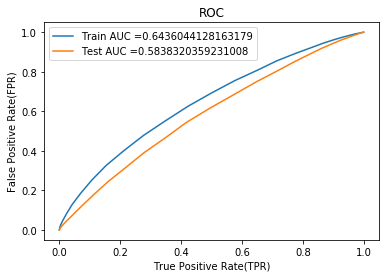

In [42]:
from sklearn.metrics import roc_curve, auc

knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=101, p=2,
                     weights='uniform')

knn.fit(X_tr_set2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(knn, X_tr_set2)    
y_test_pred = batch_predict(knn, X_te_set2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Evaluation

In [43]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

y_pred_train1 = predict_with_best_t(y_train_pred, best_t)

y_pred_test1= predict_with_best_t(y_test_pred, best_t)

the maximum value of tpr*(1-fpr) 0.36091809565402827 for threshold 0.851


#### Confusion matrix on Train Data

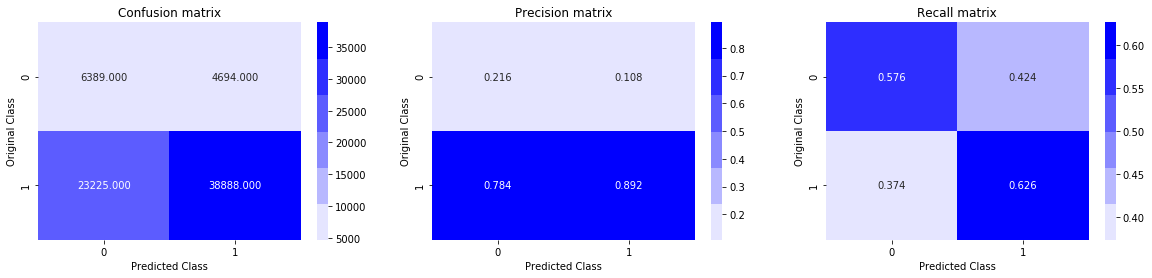

In [44]:
plot_confusion_matrix(y_train, y_pred_train1)

#### Confusion matrix on Test Data

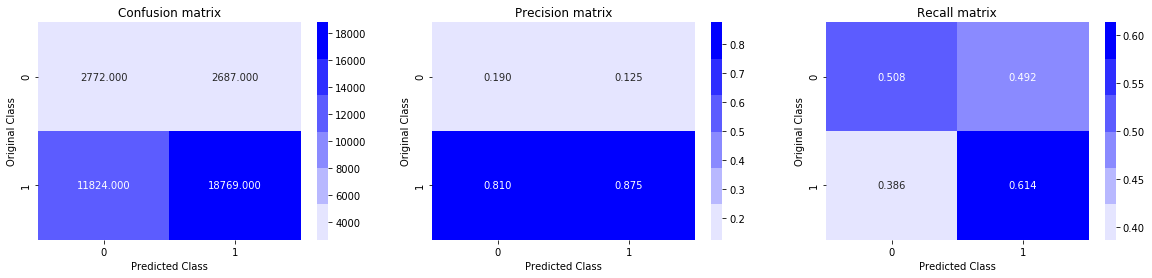

In [45]:
plot_confusion_matrix(y_test, y_pred_test1)

## Naive Bayes

### Hyperparameter Optimization

In [191]:
from sklearn.naive_bayes import MultinomialNB

In [192]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

neigh = MultinomialNB()
parameters = {'alpha': [0.00001, 0.0005, 0.0001, 0.005, 0.001, 0.05, 0.01, 0.1, 0.5, 1,5, 10, 50, 100]}
clf = RandomizedSearchCV(neigh, parameters, cv=5, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_set2, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score'] #since randomclassier has cv of 5 we are mentioning it as cv_auc while it is test score basically
K =  results['param_alpha'] #k is different values of alpha i.e our smoothning parameter.

In [199]:
# we are transfroming K to log(K) for better readability
import math
def log(x):
    return math.log(x)

K_ =  results['param_alpha'].apply(log)

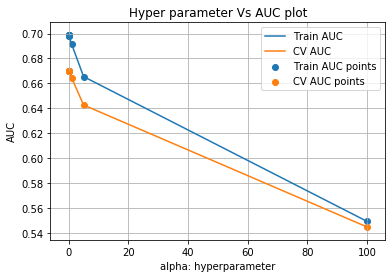

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.103550,0.000808,0.018788,0.000399,1e-05,{'alpha': 1e-05},0.672200,0.667023,0.675029,0.665662,...,0.670205,0.003430,1,0.698209,0.698564,0.697700,0.700524,0.698422,0.698684,0.000966
8,0.104146,0.002614,0.028730,0.020730,0.0001,{'alpha': 0.0001},0.672199,0.667022,0.675029,0.665662,...,0.670205,0.003430,2,0.698208,0.698564,0.697699,0.700523,0.698421,0.698683,0.000966
6,0.106257,0.006247,0.022980,0.009179,0.0005,{'alpha': 0.0005},0.672196,0.667020,0.675026,0.665661,...,0.670202,0.003430,3,0.698205,0.698561,0.697696,0.700520,0.698418,0.698680,0.000966
1,0.102750,0.000744,0.017283,0.003911,0.001,{'alpha': 0.001},0.672192,0.667017,0.675024,0.665657,...,0.670199,0.003430,4,0.698201,0.698557,0.697692,0.700516,0.698415,0.698676,0.000966
0,0.304237,0.400066,0.030646,0.017490,0.01,{'alpha': 0.01},0.672132,0.666977,0.674963,0.665616,...,0.670147,0.003421,5,0.698131,0.698490,0.697627,0.700444,0.698351,0.698609,0.000963


In [200]:
#without log scale
plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

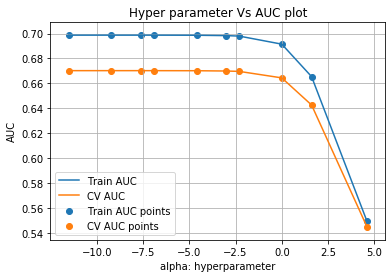

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.103550,0.000808,0.018788,0.000399,1e-05,{'alpha': 1e-05},0.672200,0.667023,0.675029,0.665662,...,0.670205,0.003430,1,0.698209,0.698564,0.697700,0.700524,0.698422,0.698684,0.000966
8,0.104146,0.002614,0.028730,0.020730,0.0001,{'alpha': 0.0001},0.672199,0.667022,0.675029,0.665662,...,0.670205,0.003430,2,0.698208,0.698564,0.697699,0.700523,0.698421,0.698683,0.000966
6,0.106257,0.006247,0.022980,0.009179,0.0005,{'alpha': 0.0005},0.672196,0.667020,0.675026,0.665661,...,0.670202,0.003430,3,0.698205,0.698561,0.697696,0.700520,0.698418,0.698680,0.000966
1,0.102750,0.000744,0.017283,0.003911,0.001,{'alpha': 0.001},0.672192,0.667017,0.675024,0.665657,...,0.670199,0.003430,4,0.698201,0.698557,0.697692,0.700516,0.698415,0.698676,0.000966
0,0.304237,0.400066,0.030646,0.017490,0.01,{'alpha': 0.01},0.672132,0.666977,0.674963,0.665616,...,0.670147,0.003421,5,0.698131,0.698490,0.697627,0.700444,0.698351,0.698609,0.000963


In [201]:
#with log scale, which increases the readabilty of the plot

plt.plot(K_, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K_, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K_, train_auc, label='Train AUC points')
plt.scatter(K_, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

### Model Training and  Prediction

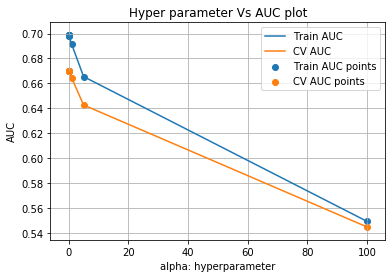

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
3,0.103550,0.000808,0.018788,0.000399,1e-05,{'alpha': 1e-05},0.672200,0.667023,0.675029,0.665662,...,0.670205,0.003430,1,0.698209,0.698564,0.697700,0.700524,0.698422,0.698684,0.000966
8,0.104146,0.002614,0.028730,0.020730,0.0001,{'alpha': 0.0001},0.672199,0.667022,0.675029,0.665662,...,0.670205,0.003430,2,0.698208,0.698564,0.697699,0.700523,0.698421,0.698683,0.000966
6,0.106257,0.006247,0.022980,0.009179,0.0005,{'alpha': 0.0005},0.672196,0.667020,0.675026,0.665661,...,0.670202,0.003430,3,0.698205,0.698561,0.697696,0.700520,0.698418,0.698680,0.000966
1,0.102750,0.000744,0.017283,0.003911,0.001,{'alpha': 0.001},0.672192,0.667017,0.675024,0.665657,...,0.670199,0.003430,4,0.698201,0.698557,0.697692,0.700516,0.698415,0.698676,0.000966
0,0.304237,0.400066,0.030646,0.017490,0.01,{'alpha': 0.01},0.672132,0.666977,0.674963,0.665616,...,0.670147,0.003421,5,0.698131,0.698490,0.697627,0.700444,0.698351,0.698609,0.000963


In [202]:
#without log scale
plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied ddfrom here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

d
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [33]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

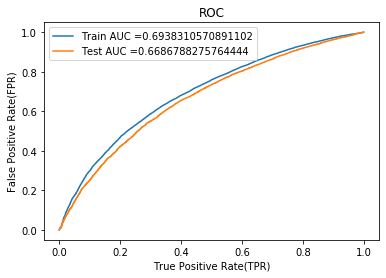

In [204]:
from sklearn.metrics import roc_curve, auc

nb_bow = MultinomialNB(alpha = 0.0001)

nb_bow.fit(X_tr_set2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(nb_bow, X_tr_set2)    
y_test_pred = batch_predict(nb_bow, X_te_set2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Conclusion: With alpha = 0.001 we get train AUC = 0.69 and test AUC = 0.67

### Model Evaluation

In [26]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [27]:
# we own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [213]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_pred_train1 = predict_with_best_t(y_train_pred, best_t)

y_pred_test1 = predict_with_best_t(y_test_pred, best_t)

the maximum value of tpr*(1-fpr) 0.41552451128011736 for threshold 0.851


#### Evaluation on Train Data

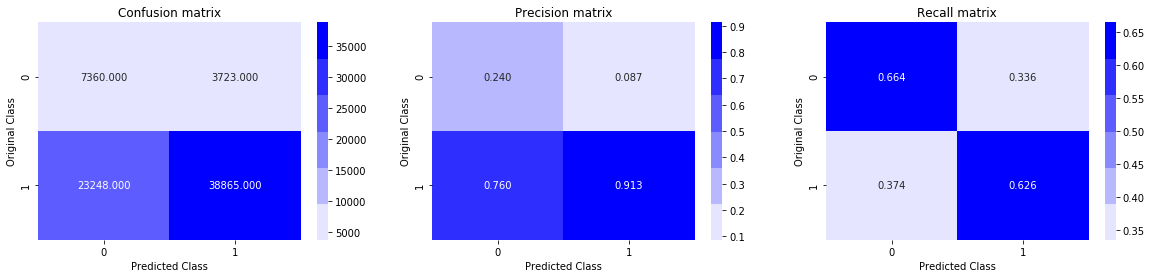

In [214]:
plot_confusion_matrix(y_train, y_pred_train1)

#### Evaluation on Test Data

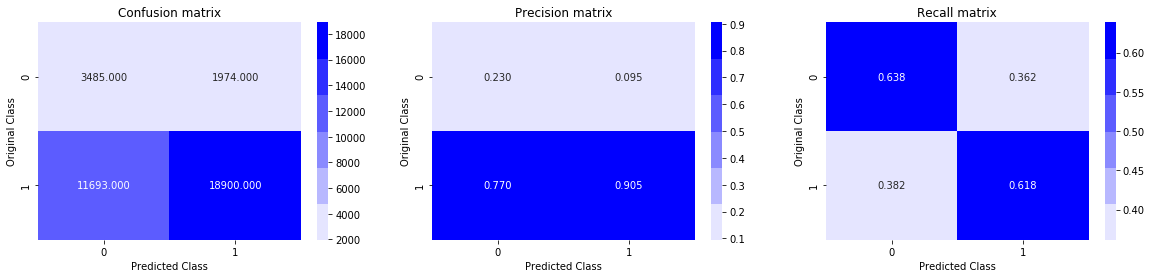

In [215]:
plot_confusion_matrix(y_test, y_pred_test1)

<b> Conclusion : We are predicting a lot of False Negatives <b/>

## Logistic Regression with Hyperparameter Tuning

### Hyperparameter Tuning

In [218]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [219]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

lr = SGDClassifier(loss='log', random_state=42)
parameters = {'alpha': [10 ** x for x in range(-5, 2)], 'penalty' : ['l1', 'l2']}
clf = RandomizedSearchCV(lr, parameters, cv=5, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_set2, y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)

In [226]:
#These are our best parameters
clf.best_estimator_

SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_tr_set3, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [225]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.855049,0.087431,0.014331,0.003153,l2,0.0001,"{'penalty': 'l2', 'alpha': 0.0001}",0.710132,0.706642,0.714140,...,0.708828,0.005037,2,0.750635,0.748156,0.753647,0.758763,0.750141,0.752269,0.003693
1,1.881602,0.153199,0.017537,0.003263,l2,1e-05,"{'penalty': 'l2', 'alpha': 1e-05}",0.709158,0.699292,0.712808,...,0.706101,0.006845,3,0.796043,0.795282,0.795317,0.800155,0.790009,0.795361,0.003228
2,0.812330,0.124768,0.009598,0.005984,l1,0.1,"{'penalty': 'l1', 'alpha': 0.1}",0.536210,0.531615,0.530584,...,0.531903,0.002784,10,0.530821,0.531973,0.532236,0.532907,0.531555,0.531898,0.000695
3,0.381573,0.021971,0.006400,0.005987,l2,1,"{'penalty': 'l2', 'alpha': 1}",0.532251,0.538940,0.532080,...,0.534732,0.002518,8,0.535696,0.533963,0.535521,0.534910,0.534634,0.534945,0.000626
4,2.792951,0.566276,0.015997,0.005067,l1,1e-05,"{'penalty': 'l1', 'alpha': 1e-05}",0.708711,0.709887,0.716315,...,0.708936,0.008313,1,0.796788,0.796119,0.796822,0.798561,0.798467,0.797352,0.000982
5,0.400869,0.026120,0.015844,0.000189,l2,10,"{'penalty': 'l2', 'alpha': 10}",0.532031,0.538167,0.531773,...,0.534225,0.002339,9,0.535029,0.533460,0.534912,0.534424,0.534082,0.534381,0.000573
6,0.415508,0.043862,0.015843,0.000181,l2,0.1,"{'penalty': 'l2', 'alpha': 0.1}",0.535262,0.544628,0.535652,...,0.539283,0.003509,7,0.541234,0.538845,0.540790,0.539556,0.539723,0.540030,0.000866
7,1.050504,0.173928,0.012724,0.003860,l1,0.0001,"{'penalty': 'l1', 'alpha': 0.0001}",0.697057,0.698915,0.689605,...,0.694649,0.003190,4,0.706039,0.706061,0.703848,0.708105,0.702812,0.705373,0.001858
8,0.580978,0.038499,0.017444,0.003270,l2,0.001,"{'penalty': 'l2', 'alpha': 0.001}",0.645313,0.656723,0.651332,...,0.653621,0.004770,5,0.664905,0.675211,0.672199,0.678087,0.675529,0.673186,0.004542
9,0.745888,0.102941,0.012722,0.003856,l1,0.001,"{'penalty': 'l1', 'alpha': 0.001}",0.553318,0.565388,0.563218,...,0.564382,0.006183,6,0.560112,0.566022,0.565432,0.568766,0.570593,0.566185,0.003566


In [221]:
lra_results = results.sort_values(['param_alpha'])
lrp_results = results.sort_values(['param_penalty'])
train_auc= list(results['mean_train_score'])
train_auc_std= list(results['std_train_score'])
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']

### Model Training, Predictions

In [223]:
type(lra_results)

pandas.core.frame.DataFrame

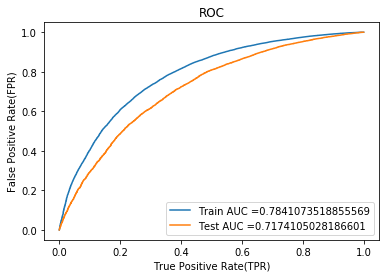

In [227]:
from sklearn.metrics import roc_curve, auc

lr = SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

lr.fit(X_tr_set2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(lr, X_tr_set2)    
y_test_pred = batch_predict(lr, X_te_set2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

Looks like we are overfitting a little bit

### Model Evaluation

In [229]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

y_pred_train2 = predict_with_best_t(y_train_pred, best_t)

y_pred_test2 = predict_with_best_t(y_test_pred, best_t)

the maximum value of tpr*(1-fpr) 0.5118046915098851 for threshold 0.839


#### Evaluation on Train Data

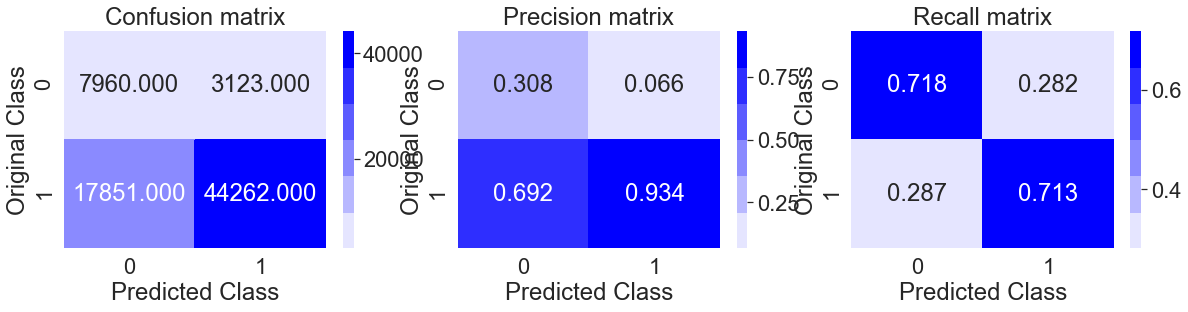

In [233]:
plot_confusion_matrix(y_train, y_pred_train2)

#### Evaluation on Test Data

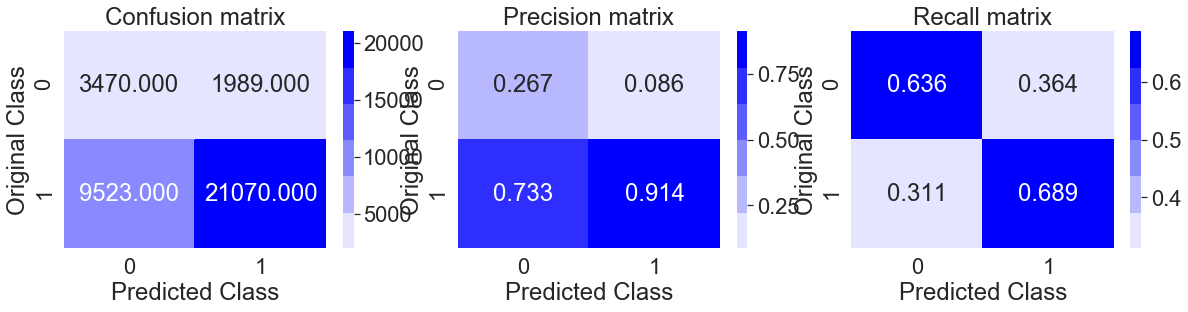

In [234]:
plot_confusion_matrix(y_test, y_pred_test2)

Amazing, we are predicting less false negatives as compared to Naive Bayes

## Decision Trees

### Hyperparameter Optimization

In [240]:
from sklearn import tree
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

dtm = tree.DecisionTreeClassifier()
parameters = {'max_depth': [1, 5, 10, 50, 100], 'min_samples_leaf' : [5, 10, 100, 500, 1000]}
clf = RandomizedSearchCV(dtm, parameters, cv=5, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_set2, y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)
md_results = results.sort_values(['param_max_depth'])
msl_results = results.sort_values(['param_min_samples_leaf'])

train_auc= list(results['mean_train_score'])
train_auc_std= list(results['std_train_score'])
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K_md =  list(results['param_max_depth'])
K_msl = list(results['param_min_samples_leaf'])

In [241]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=500, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
results

### Model Training and Predictions

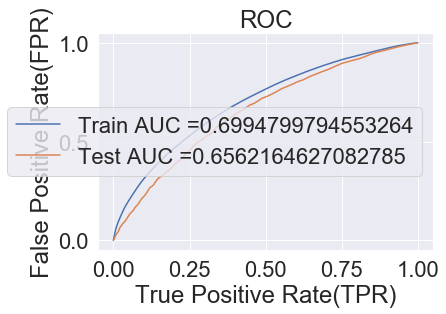

In [242]:
from sklearn.metrics import roc_curve, auc

dtm = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=500, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

dtm.fit(X_tr_set2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(dtm, X_tr_set2)    
y_test_pred = batch_predict(dtm, X_te_set2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Model Evaluation

In [243]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_pred_train3 = predict_with_best_t(y_train_pred, best_t)
y_pred_test3 = predict_with_best_t(y_test_pred, best_t)

the maximum value of tpr*(1-fpr) 0.41561648709228005 for threshold 0.847


#### Evaluation on Train Data

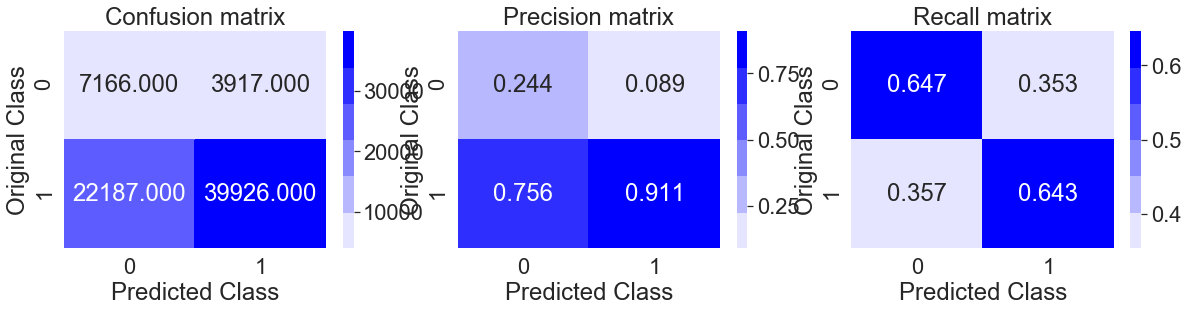

In [246]:
plot_confusion_matrix(y_train, y_pred_train3)

#### Evaluation on Test Data

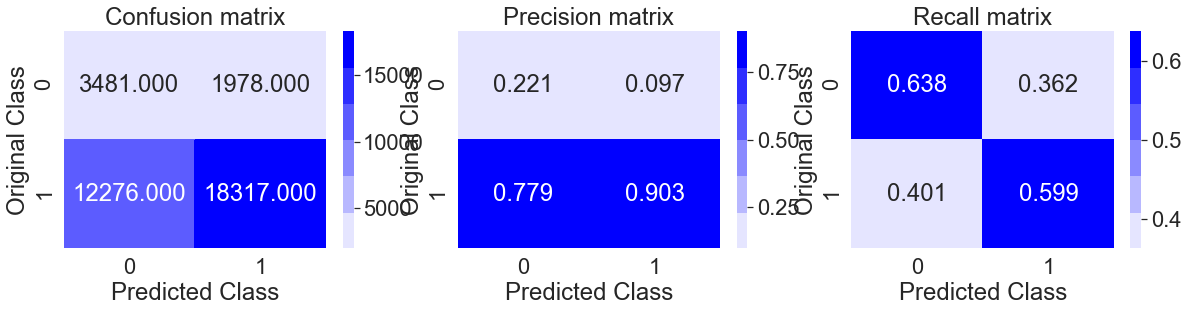

In [248]:
plot_confusion_matrix(y_test, y_pred_test3)

Till now Logistic Regression performs best.

## Ensemble Models : Random Forest

### Hyperparameter Optimization

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn import tree
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
parameters = {'criterion': ["gini", "entropy"], 'n_estimators' : [100, 200, 500, 1000, 2000],'max_depth':[5, 8, 15, 25]}
clf = RandomizedSearchCV(rf, parameters, cv=5, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_set2, y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)

In [253]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,45.000456,2.804653,1.133553,0.128144,100,15,entropy,"{'n_estimators': 100, 'max_depth': 15, 'criter...",0.684535,0.690375,...,0.693391,0.006383,3,0.921894,0.921318,0.926990,0.927555,0.922961,0.924143,0.002615
1,87.688085,2.269578,1.081187,0.018527,100,25,entropy,"{'n_estimators': 100, 'max_depth': 25, 'criter...",0.692084,0.694540,...,0.696352,0.005232,2,0.994893,0.995181,0.994827,0.995969,0.993703,0.994915,0.000729
2,201.424400,3.057172,17.936283,0.067085,2000,5,entropy,"{'n_estimators': 2000, 'max_depth': 5, 'criter...",0.686222,0.688605,...,0.690639,0.004483,5,0.745736,0.749074,0.749181,0.749996,0.748032,0.748404,0.001473
3,14.086032,0.203328,1.826336,0.055042,200,5,gini,"{'n_estimators': 200, 'max_depth': 5, 'criteri...",0.676430,0.681043,...,0.680905,0.004563,9,0.731525,0.739238,0.735055,0.732332,0.736367,0.734903,0.002792
4,7.448348,0.655680,0.922610,0.022131,100,5,gini,"{'n_estimators': 100, 'max_depth': 5, 'criteri...",0.665736,0.678892,...,0.676924,0.008418,10,0.718986,0.735899,0.729039,0.726310,0.732174,0.728482,0.005724
5,172.834091,2.425920,2.175261,0.062990,200,25,entropy,"{'n_estimators': 200, 'max_depth': 25, 'criter...",0.695333,0.703795,...,0.701264,0.005624,1,0.996565,0.997089,0.996349,0.997079,0.996484,0.996713,0.000311
6,57.124636,0.379068,4.734133,0.080985,500,8,gini,"{'n_estimators': 500, 'max_depth': 8, 'criteri...",0.682162,0.685628,...,0.687741,0.004775,7,0.786929,0.792121,0.792994,0.794882,0.791642,0.791714,0.002636
7,17.172867,0.254964,0.944862,0.028774,100,8,entropy,"{'n_estimators': 100, 'max_depth': 8, 'criteri...",0.682570,0.679709,...,0.684680,0.003944,8,0.791406,0.782972,0.792596,0.792616,0.790010,0.789920,0.003603
8,167.172868,9.268564,2.845924,0.193819,200,25,gini,"{'n_estimators': 200, 'max_depth': 25, 'criter...",0.689871,0.687379,...,0.693278,0.005770,4,0.981956,0.984025,0.982734,0.982861,0.983652,0.983045,0.000727
9,76.130428,10.956446,5.785092,0.756767,500,5,entropy,"{'n_estimators': 500, 'max_depth': 5, 'criteri...",0.684634,0.685791,...,0.689732,0.005261,6,0.744672,0.749370,0.748803,0.748236,0.745884,0.747393,0.001805


In [252]:
# At these best_estimators we were overfitting the model to a great extend. Train AUC = 0.99 and valid_AUC = 0.69. :(
clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Model Training and Predictions

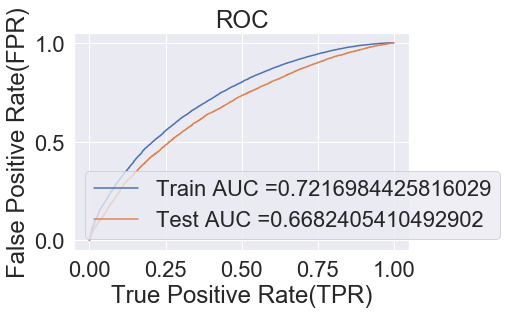

In [258]:
from sklearn.metrics import roc_curve, auc

rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rf.fit(X_tr_set2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(rf, X_tr_set2)    
y_test_pred = batch_predict(rf, X_te_set2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

### Model Evaluation

In [259]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_pred_train4 = predict_with_best_t(y_train_pred, best_t)
y_pred_test4 = predict_with_best_t(y_test_pred, best_t)

the maximum value of tpr*(1-fpr) 0.435943660175295 for threshold 0.847


#### Evaluation on Train Data

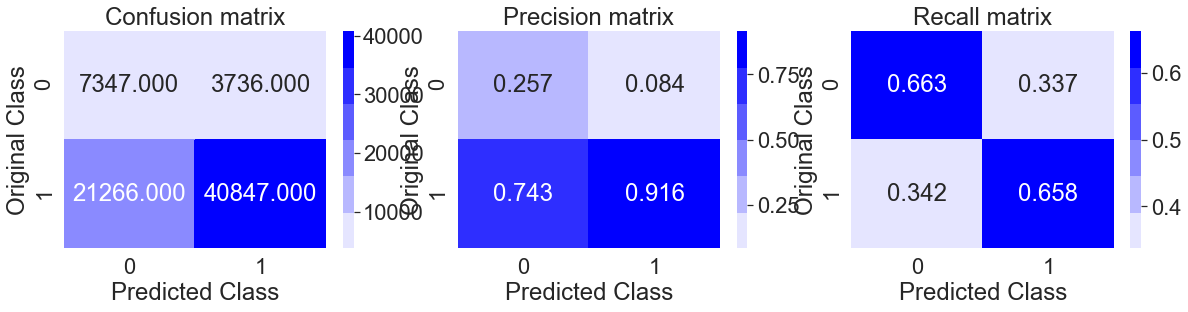

In [260]:
plot_confusion_matrix(y_train, y_pred_train4)

#### Evaluation on Test Data

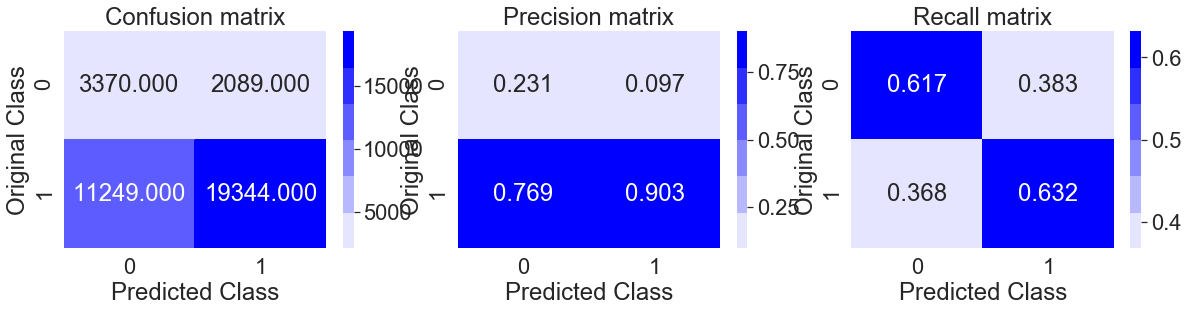

In [261]:
plot_confusion_matrix(y_test, y_pred_test4)

So, Logistic Regression Seems to perform best till now.

### Boosting

#### XGBoost

In [28]:
from xgboost import XGBClassifier

It took around 5 hrs to find the optimal parameters, its a very bad idea to throw so many parameters to the model :P


##### Hyperparameter Optimization

In [270]:
xgb = XGBClassifier()
parameters = {'eta': [0.01,0.015, 0.025, 0.05, 0.1],
              'gamma': [0.05,0.1,0.3,0.5,0.7,0.9,1.0],
              'max_depth': [3, 5, 7, 9, 12, 15, 17, 25],
              'min_child_weight': [1, 3, 5, 7],
              'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
              'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
              'lambda' : [0.01, 0.03, 0.05, 0.07, 0.09, 1],
              'alpha': [0, 0.1, 0.5, 1.0]
             }
clf = RandomizedSearchCV(xgb, parameters, cv=5, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_set2, y_train)
results = pd.DataFrame.from_dict(clf.cv_results_)

##### Model Training and Predictions

In [ ]:
from sklearn.metrics import roc_curve, auc

xgb = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,   
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=5
                   )

xgb.fit(X_tr_set2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted output


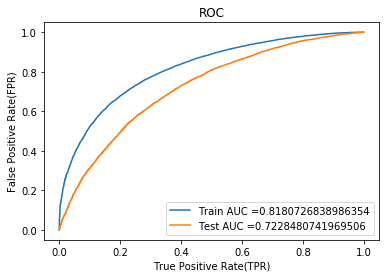

In [34]:
                    
y_train_pred = batch_predict(xgb, X_tr_set2)    
y_test_pred = batch_predict(xgb, X_te_set2)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC")
# plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

<b> Looks like the model is overfitting a little </b>

##### Model Evaluation

###### Confusion Matrix

In [35]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
y_pred_train5 = predict_with_best_t(y_train_pred, best_t)
y_pred_test5 = predict_with_best_t(y_test_pred, best_t)

the maximum value of tpr*(1-fpr) 0.5482492209645369 for threshold 0.833


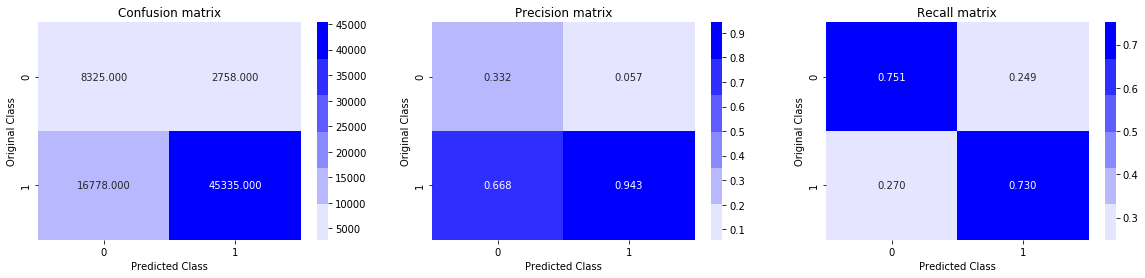

In [36]:
# Model Evaluation on Train Data
plot_confusion_matrix(y_train, y_pred_train5)

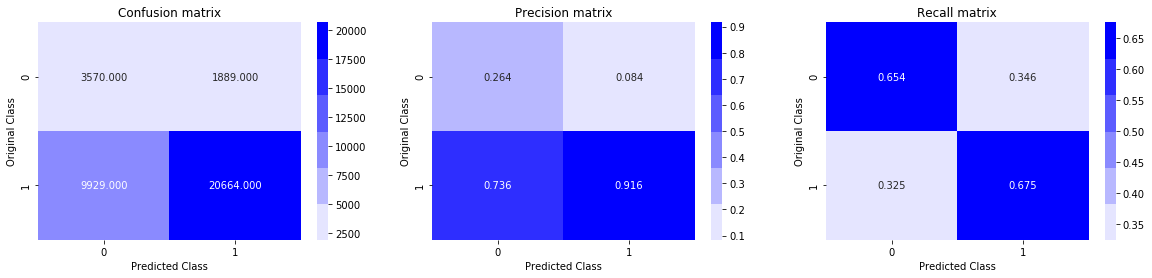

In [37]:
# Model Evaluation on Test Data
plot_confusion_matrix(y_test, y_pred_test5)

Let try some deep Learning Models and see how they perform as compared to classic machine learning

# Summary of Machine Learning Models and there perfomance

In [48]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Train AUC", "Test AUC"]
x.add_row(["TFIDF", "KNN ", "0.64", "0.58"])
x.add_row(["TFIDF", "Naive Bayes", "0.69", "0.66"])
x.add_row(["TFIDF", "Logistic Regression", "0.78", "0.71"])
x.add_row(["TFIDF", "Decision Trees", "0.69", "0.65"])
x.add_row(["TFIDF", "Random Forest", "0.72", "0.66"])
x.add_row(["TFIDF", "XGBoost", "0.81", "0.72"])

In [49]:
print(x)

+------------+---------------------+-----------+----------+
| Vectorizer |        Model        | Train AUC | Test AUC |
+------------+---------------------+-----------+----------+
|   TFIDF    |         KNN         |    0.64   |   0.58   |
|   TFIDF    |     Naive Bayes     |    0.69   |   0.66   |
|   TFIDF    | Logistic Regression |    0.78   |   0.71   |
|   TFIDF    |    Decision Trees   |    0.69   |   0.65   |
|   TFIDF    |    Random Forest    |    0.72   |   0.66   |
|   TFIDF    |       XGBoost       |    0.81   |   0.72   |
+------------+---------------------+-----------+----------+


<b> Conclusion: We can say that Logistic Regression Performs the best considering less amount of time taken by it to train the model. <b> 